In [1]:
#YC95

9.3

Predicting Prices of Used Cars (Regression Trees). The file ToyotaCorolla.csv contains the data on used cars (Toyota Corolla) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal is to predict the price of a used Toyota Corolla based on its specifications. (The example in Section 9.7 is a subset of this dataset.)

Data Preprocessing. Split the data into training (60%), and validation (40%) datasets.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the data cars
cars_df = pd.read_csv("ToyotaCorolla.csv")
cars_df.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [4]:
cars_df.shape

(1436, 39)

In [5]:
# Preprocess the data
cars_df = pd.get_dummies(cars_df, columns=["Fuel_Type"])
X = cars_df[['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee',
          'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
          'Sport_Model', 'Tow_Bar']]
y = cars_df['Price']

In [6]:
# Data Preprocessing. Split the data into training (60%), and validation (40%) datasets.

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

a.
Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04, KM, Fuel_Type (first convert to dummies), HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_ airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Set random_state=1.

In [7]:
# Run a full-grown regression tree
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

i.  Which appear to be the three or four most important car specifications for predicting the car’s price?

In [8]:
# i. Three or four most important car specifications
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 4 Important features:")
for i in range(4):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

Top 4 Important features:
Age_08_04: 0.834656871021145
HP: 0.05151018628897059
KM: 0.05045727797311556
Quarterly_Tax: 0.018949636869660336


ii. Compare the prediction errors of the training and validation sets by examining their RMS error and by plotting the two boxplots. How does the predictive performance of the validation set compare to the training set? Why does this occur?

In [9]:
# ii. Compare prediction errors
train_predictions = regressor.predict(X_train)
valid_predictions = regressor.predict(X_valid)
train_error = mean_squared_error(y_train, train_predictions, squared=False)
valid_error = mean_squared_error(y_valid, valid_predictions, squared=False)

print(f"Training RMS Error: {train_error}")
print(f"Validation RMS Error: {valid_error}")

Training RMS Error: 0.0
Validation RMS Error: 1471.3677020998555


iii. How might we achieve better validation predictive performance at the expense of training performance?

Answer:

Achieving better validation performance might require regularization or pruning the tree to prevent overfitting.

use ensemble methos like Random firest or Gradient Boosted trees.

Use techniques like regarizations.

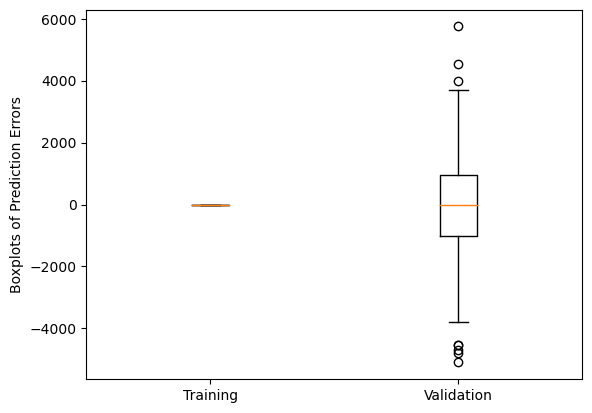

In [10]:

# Boxplots for RMS errors
errors = [train_predictions - y_train, valid_predictions - y_valid]
plt.boxplot(errors, labels=["Training", "Validation"])
plt.ylabel("Boxplots of Prediction Errors")
plt.show()

iv. Create a smaller tree by using GridSearchCV() with cv = 5 to find a fine-tuned tree. Compared to the full-grown tree, what is the predictive performance on the validation set?

In [11]:
# iv. Create a smaller tree using GridSearchCV

param_grid = {'max_depth': np.arange(3, 10), 'min_samples_split': np.arange(2, 10)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
best_valid_predictions = best_tree.predict(X_valid)
best_valid_error = mean_squared_error(y_valid, best_valid_predictions, squared=False)
print(f"Validation RMS Error with GridSearchCV: {best_valid_error}")

Validation RMS Error with GridSearchCV: 1214.4568596750194


In [12]:
# HO3